In [25]:
import pandas as pd
import matplotlib.pyplot as plt

'''
class phone with parameteres: 
    name: string
    processor speed: int
    price: int 
    ram: int
    inferior: bool
# inferior is check while comparing two phones if it's inferior or not
'''
class Phone:
    def __init__(self, name, speed, price, ram):
        self.name = name
        self.speed = speed
        self.price = price
        self.ram = ram
        self.inferior = False

In [26]:
'''
function to read data from csv using pandas `read_csv` function
'''
def read_phones_from_csv(filename):
    # initialized list `phones`, which will store list of phone object
    phones = []
    
    with open(filename, 'r') as csv_file:
        # phones_data: DataFrame of Phone's csv data
        phones_data = pd.read_csv(csv_file)
        '''
        sample `phones_data`:
          name    speed   price   ram
        0 iphone  3       40      8
        1 oneplus 4       30      16
        2 samsung 5       40      12
        3 jio     2       40      1
        '''
        for row in range(0,len(phones_data)):
            phone=Phone(phones_data['name'][row],
                        int(phones_data['speed'][row]), 
                        int(phones_data['price'][row]), 
                        int(phones_data['ram'][row])
                        )
            phones.append(phone)
    return phones

In [27]:
'''
function to update `inferior` parameter as per the conditions
'''
def find_non_inferior_phones(phones):
    for i in range(len(phones)):
        for j in range(len(phones)):
            if i == j:
                continue
            
            # if all paramaters are same  then continue
            
            if (
                phones[j].speed == phones[i].speed
                and phones[j].price == phones[i].price
                and phones[j].ram == phones[i].ram
            ):
                continue
            
            # if speed is low or equal, price is high or equal, ram is low or equal of `ith phone` then it is inferior
            
            elif (
                phones[i].speed <= phones[j].speed
                and phones[i].price >= phones[j].price
                and phones[i].ram <= phones[j].ram
            ):
                phones[i].inferior = True

            # if speed is low or equal, price is high or equal, ram is low or equal of `jth phone` then it is inferior
            
            elif (
                phones[j].speed <= phones[i].speed
                and phones[j].price >= phones[i].price
                and phones[j].ram <= phones[i].ram
            ):
                phones[j].inferior = True

In [82]:
'''
this function is taking input: list of phones
plotting for each phone:
speed in blue color
price in green color
ram in red color
'''
def plot_phone_attributes(phones):
    attributes = ['speed', 'price', 'ram']
    colors = ['blue', 'green', 'red']
    
    # an array of x values for the bars
    x = range(len(phones))
    bar_width = 0.1
    
    # subplots for each attribute
    fig, ax = plt.subplots(figsize=(10, 5))

    # travesing the values and plotting in subplots
    for i, attr in enumerate(attributes):
        y_data = [getattr(phone, attr) for phone in phones]
        x_data = range(len(phones))
        ax.plot(x_data, y_data, marker='o', linestyle='-', label=attr.capitalize(), color=colors[i])
    
    ax.grid(True) # turning on grid
    ax.set_xticks(x) # sticking with values according to x- axis
    ax.set_xlabel("Phone Name") # x label
    ax.set_ylabel("Attribute Value") # y label
    ax.set_title("Phone Attribute Comparison") # graph title
    ax.set_xticklabels([phone.name for phone in phones]) # setting phone names on x-axis
    ax.legend() # to show details of y-axis colors
    plt.show()

Non-Inferior Phones:
Name: oneplus, Speed: 4, Price: 30, RAM: 16
Name: samsung, Speed: 5, Price: 40, RAM: 12
Name: test-phone2, Speed: 4, Price: 30, RAM: 16


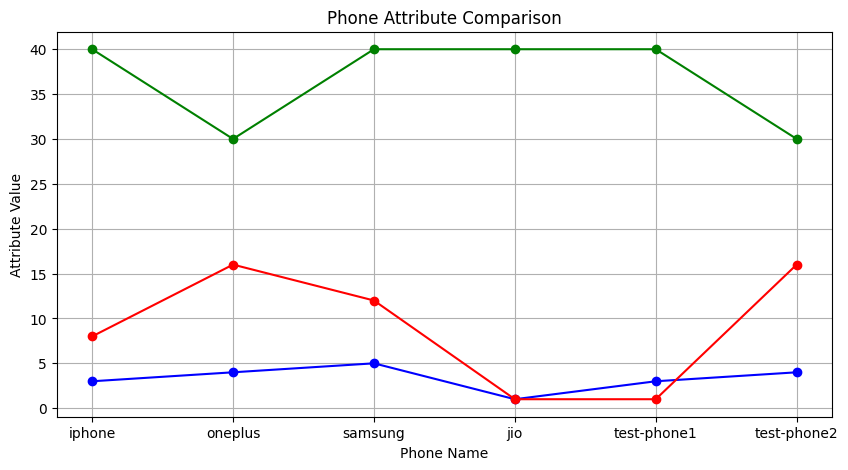

In [83]:
if __name__ == "__main__":
    # 'phones.csv' will have the data columns: name, speed, price, ram
    filename = 'phones.csv'
    
    # function call to get list of phone object
    phones = read_phones_from_csv(filename)
    
    # fucntion call to compare all phone's data
    find_non_inferior_phones(phones)

    print("Non-Inferior Phones:")
    
    # printing non-inferior phone's details
    for phone in phones:
        if not phone.inferior:
            print(f"Name: {phone.name}, Speed: {phone.speed}, Price: {phone.price}, RAM: {phone.ram}")

    # function call to get graphs
    plot_phone_attributes(phones)